# Final Project
## Tyler Baker and Rathish Parayil Sasidharan

Your project should incorporate one or both of the two main themes of this course: network analysis and text processing. You need to show all of your work in a coherent workflow, and in a reproducible format, such as an IPython Notebook or an R Markdown document. If you are building a model or models, explain how you evaluate the “goodness” of the chosen model and parameters. 

## Introduction


### Setting the Environment

In [195]:
import pandas as pd
import numpy as np
import networkx as nx
import nltk
import random
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import re
import string
import math
import collections

### The Data
We got our data from <a href="https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews">Kaggle</a>. The data consists of two columns: reviews and scores.

In [156]:
data_raw = pd.read_table("https://raw.githubusercontent.com/tylerbaker01/Data-620/main/Restaurant_Reviews.tsv")

In [161]:
data_raw.columns = ["review", "score"]

In [162]:
data_raw.tail()

,review,score
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


We want to add restaurant IDs and Customer Ids. In order to have repitition we must insure that the amount of reviews > the amount of users > the amount of restaurants. Note that there are 1000 reviews. Let's say that there are 100 users and 20 restaurants. We chose these numbers at random, but they will allow for a lot of connections between restaurants and reviewers.

In [163]:
users_list = []
for i in range(100):
    users_list.append(f"Customer {i}")
users_list = users_list*100

In [164]:
restaurants_list = []
for i in range(20):
    restaurants_list.append(f"Restaurant {i}")
restaurants_list = restaurants_list *500

Now we have made a list of 600 users and 100 restaurants. Next we must make a list of length 1000 for each where each index is randomly selected from the lists above.

In [165]:
random.seed(97)
users= []
for i in range(1000):
    users.append(random.choice(users_list)) 

In [166]:
restaurants = []
for i in range(1000):
    restaurants.append(random.choice(restaurants_list))

In [167]:
df = data_raw

df["user_id"] = users
df["restaurant_id"] = restaurants

In [168]:
df.head()

,review,score,user_id,restaurant_id
0,Wow... Loved this place.,1,Customer 87,Restaurant 13
1,Crust is not good.,0,Customer 28,Restaurant 2
2,Not tasty and the texture was just nasty.,0,Customer 95,Restaurant 16
3,Stopped by during the late May bank holiday of...,1,Customer 34,Restaurant 17
4,The selection on the menu was great and so wer...,1,Customer 10,Restaurant 17


We have now created our data frame.

## Part 1
### SNA

## Part 2 - NLP
### Analyze Review Data
Our goal here is to analyze the review data.
#### Handling the Data

In [36]:
df_nlp = df

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

In [38]:
text = df_nlp[['review']]

Now we need to start cleaning the data. There are contractions, capitalization, punctuation, and numerals that we do not want.

In [39]:
# First we will remove contractions.
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

text['review']=text['review'].apply(lambda x:expand_contractions(x))

C:\Users\tyler\AppData\Local\Temp/ipykernel_5092/3291383234.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['review']=text['review'].apply(lambda x:expand_contractions(x))


In [43]:
# Now we will turn every word into lowercase.
text['review']=text['review'].apply(lambda x: x.lower())

C:\Users\tyler\AppData\Local\Temp/ipykernel_5092/3873873711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['review']=text['review'].apply(lambda x: x.lower())


In [47]:
# Now we will remove punctuations.
text['review']=text['review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

C:\Users\tyler\AppData\Local\Temp/ipykernel_5092/1535979897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['review']=text['review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [49]:
# Finally, we will remove numerals.
text['review']=text['review'].apply(lambda x: re.sub('\w*\d\w*','', x))

C:\Users\tyler\AppData\Local\Temp/ipykernel_5092/799112792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['review']=text['review'].apply(lambda x: re.sub('\w*\d\w*','', x))


Great. We have cleaned the reviews and now we want to split the data by each word.

In [52]:
txt = text['review']
txt = txt.values.tolist()

In [86]:
t = ' '.join(txt)

In [84]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [91]:
words = word_tokenize(t)

In [92]:
words[0:10]

['wow', 'loved', 'this', 'place', 'crust', 'is', 'not', 'good', 'not', 'tasty']

Now we can remove stopwords.

In [93]:
from nltk.corpus import stopwords

In [94]:
stop_words = set(stopwords.words('english'))

In [95]:
filtered_list = []

In [97]:
# store all of the non stop words.
for word in words:
    if word.casefold() not in stop_words:
        filtered_list.append(word)

Now we want to reduce our words down to their root words.

In [101]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [105]:
lemmatized_list = []
for word in words:
    lemmatized_list.append(lemmatizer.lemmatize(word))

In [102]:
lemmatized_list = [lemmatizer.lemmatize(word) in filtered_list]

#### Analyzing

In [111]:
# Tokens
from nltk import FreqDist
freq = FreqDist(lemmatized_list)

We will create a list of the 20 most common used words from the reviews.

In [113]:
freq.most_common(20)

[('the', 584),
 ('and', 389),
 ('i', 356),
 ('wa', 308),
 ('a', 273),
 ('to', 219),
 ('is', 213),
 ('not', 208),
 ('it', 152),
 ('this', 143),
 ('of', 127),
 ('food', 125),
 ('place', 111),
 ('for', 110),
 ('in', 107),
 ('good', 95),
 ('service', 84),
 ('we', 84),
 ('have', 84),
 ('very', 75)]

Next we will create a list of the most common collocations.

In [137]:
# Bigrams
bigrams = nltk.bigrams(lemmatized_list)

In [138]:
bigram_freq = FreqDist(bigrams)

In [139]:
bigram_freq.most_common(20)

[(('this', 'place'), 73),
 (('the', 'food'), 47),
 (('it', 'wa'), 45),
 (('i', 'have'), 39),
 (('and', 'the'), 38),
 (('food', 'wa'), 33),
 (('and', 'i'), 30),
 (('of', 'the'), 29),
 (('it', 'is'), 28),
 (('do', 'not'), 27),
 (('i', 'will'), 27),
 (('i', 'am'), 26),
 (('service', 'wa'), 26),
 (('wa', 'not'), 26),
 (('on', 'the'), 25),
 (('did', 'not'), 25),
 (('the', 'service'), 25),
 (('will', 'not'), 25),
 (('i', 'wa'), 23),
 (('wa', 'very'), 22)]

In [140]:
# Trigrams
trigrams = nltk.trigrams(lemmatized_list)
trigram_freq = FreqDist(trigrams)

In [141]:
trigram_freq.most_common(20)

[(('will', 'not', 'be'), 21),
 (('the', 'food', 'wa'), 20),
 (('this', 'place', 'is'), 18),
 (('the', 'service', 'wa'), 15),
 (('i', 'do', 'not'), 14),
 (('i', 'will', 'not'), 12),
 (('and', 'it', 'wa'), 11),
 (('i', 'have', 'ever'), 10),
 (('the', 'food', 'is'), 9),
 (('i', 'have', 'been'), 9),
 (('our', 'server', 'wa'), 7),
 (('this', 'place', 'the'), 7),
 (('not', 'be', 'back'), 7),
 (('will', 'be', 'back'), 6),
 (('it', 'wa', 'not'), 6),
 (('one', 'of', 'the'), 6),
 (('and', 'the', 'food'), 6),
 (('this', 'is', 'a'), 6),
 (('to', 'go', 'back'), 6),
 (('and', 'the', 'service'), 6)]

#### Visualization

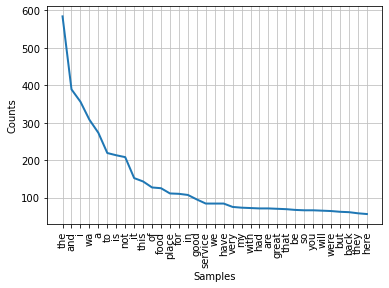

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [124]:
freq.plot(35)

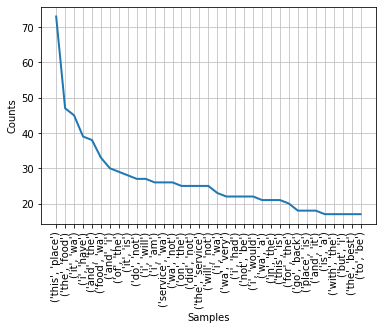

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [142]:
bigram_freq.plot(35)

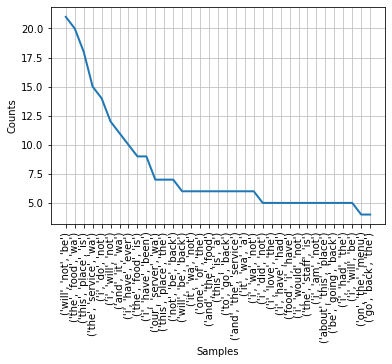

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [143]:
trigram_freq.plot(35)

### Rating Prediction
The goal here is to take the review data and split it into a training set and a test set. Then we train the training set until we can attempt to predict the test set. We want each review to be either rated as: Good, or Bad. Realistically, a rating system with more options that good or bad is much better. Unfortunately, we have the data we have. 

We will make three sets. A test_set of 100 reviews, a dev_test set of 100 reviews, and a train_set of 800 reviews.

#### The Data
We will use the data from the beginning but we only need the reviews and the score.

In [170]:
reviews_scores = data_raw[["review", "score"]]

In [180]:
reviews_scores = reviews_scores.values.tolist()

#### Creating the Simulation
This will be done very much like project 3. Since project 3 used polarized data, and we are here it will make a nice transition.

In [176]:
def accuracy(number_of_runs, function):
    accuracy_df = {
        "classifier": [],
        "train_set_acc": [],
        "dev_set_acc": [],
        "test_acc": []
    }
    for i in range(number_of_runs):
        random.shuffle(reviews_scores)
        dev_name_set = reviews_scores[0:100]
        test_name_set = reviews_scores[100:200]
        train_name_set = reviews_scores[200:]
        dev_set = [(function(n), i) for (n, i) in dev_name_set]
        test_set = [(function(n), i) for (n, i) in test_name_set]
        train_set = [(function(n), i) for (n, i) in train_name_set]
        classifier = nltk.NaiveBayesClassifier.train(train_set)
        accuracy_df["classifier"].append(classifier)
        accuracy_df["train_set_acc"].append(nltk.classify.accuracy(classifier, train_set))
        accuracy_df["dev_set_acc"].append(nltk.classify.accuracy(classifier, dev_set))
        accuracy_df["test_acc"].append(nltk.classify.accuracy(classifier, test_set))
    accuracy_df = pd.DataFrame.from_dict(accuracy_df)
    return(accuracy_df)

#### Creating Features
Now we can create features which classify the text based on certain conditions.

In [173]:
# Length of Review. Total characters.
def length_of_review(review):
    return {"length": len(review)}

In [181]:
char_amount_df = accuracy(100, length_of_review)

In [182]:
char_amount_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.00000
mean,0.640400,0.466400,0.47910
std,0.006858,0.047917,0.04864
min,0.623750,0.370000,0.38000
25%,0.636250,0.437500,0.44000
50%,0.640000,0.460000,0.47500
75%,0.645000,0.500000,0.51000
max,0.657500,0.590000,0.63000


In [184]:
# The amount of words in a review.
def words_in_review(review):
    return {"length": len(review.split())}

In [185]:
word_amount_df = accuracy(100, words_in_review)

In [186]:
word_amount_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.000000
mean,0.581113,0.513300,0.521700
std,0.006904,0.053164,0.052108
min,0.567500,0.380000,0.400000
25%,0.576250,0.477500,0.490000
50%,0.580625,0.510000,0.520000
75%,0.585000,0.550000,0.560000
max,0.598750,0.640000,0.640000


In [187]:
# If the letters "b" and "g" are in the review.
def b_n_g(review):
    return {"b_and_g": bool(re.match('^[bg]+$', review))}

In [188]:
b_n_g_df = accuracy(100, b_n_g)

In [189]:
b_n_g_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.000000
mean,0.506762,0.474200,0.471700
std,0.004537,0.042048,0.043066
min,0.500000,0.360000,0.330000
25%,0.502500,0.450000,0.450000
50%,0.506250,0.470000,0.480000
75%,0.510000,0.500000,0.500000
max,0.518750,0.580000,0.560000


In [190]:
# Amount of words and amount of characters
def amounts(review):
    return {"char_len": len(review), "word_amount": len(review.split())}

In [191]:
amounts_df = accuracy(100, amounts)

In [192]:
amounts_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.000000
mean,0.652313,0.497600,0.491000
std,0.009690,0.049485,0.045048
min,0.632500,0.400000,0.400000
25%,0.646250,0.460000,0.460000
50%,0.651250,0.500000,0.490000
75%,0.658750,0.530000,0.520000
max,0.687500,0.630000,0.590000


So clearly the features we have tried have not worked well. Our next attempt is to make a list of positive words and a list of negative words to use as features.

In [216]:
positive_words = ["good", "positive", "excellent", "fun", "awesome", "delicious", "wow", "affordable", "clean", "quick"]
negative_words = ["bad", "loud", "dirty", "dark", "gross", "expensive", "slow", "rude", "negative", "crowded"]

In [217]:
# Positive_words
def p_words(review):
    words = review.split()
    return {"matches": any(i in words for i in positive_words)}

In [219]:
positive_df = accuracy(100, p_words)

In [220]:
positive_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.000000
mean,0.556163,0.563200,0.557500
std,0.007047,0.039514,0.048396
min,0.538750,0.460000,0.460000
25%,0.551250,0.540000,0.520000
50%,0.556250,0.560000,0.560000
75%,0.560000,0.590000,0.590000
max,0.573750,0.670000,0.690000


In [221]:
# Negative_words
def neg_words(review):
    words = review.split()
    return {"matches": any(i in words for i in negative_words)}

In [222]:
neg_df = accuracy(100, neg_words)

In [223]:
neg_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.000000
mean,0.519187,0.503500,0.506400
std,0.006610,0.050898,0.049859
min,0.506250,0.380000,0.380000
25%,0.513750,0.470000,0.480000
50%,0.518750,0.510000,0.510000
75%,0.523750,0.540000,0.540000
max,0.540000,0.620000,0.610000


So that did no help much either. Let's see what happens if we combine them.

In [226]:
def common_words(review):
    words = review.split()
    return {"matches": any(i in words for i in (negative_words + positive_words))}

In [227]:
com_df = accuracy(100, common_words)

In [228]:
com_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.000000
mean,0.538538,0.546300,0.531500
std,0.008068,0.046551,0.046891
min,0.518750,0.410000,0.360000
25%,0.532500,0.520000,0.500000
50%,0.538750,0.550000,0.535000
75%,0.542812,0.580000,0.560000
max,0.561250,0.640000,0.640000


#### Conclusions for the prediction model
That was hard, and surprising. The models that used review lengths as their features performed better than those that were matched to other lists. I imagine if we had a bigger list of the most commonly used positive and negative words are model would score much higher.